# DATA DESCRIPTION

This dataset includes details of Customer churn i.e why people stop doing business with a company. Following are the independent and dependent variables present in then Dataset:

Independent Variable:
- customerID
- gender
- SeniorCitizen
- PartnercustomerID
- gender
- SeniorCitizen
- Partner
- Dependents
- tenure
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity 
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- MonthlyCharges
- TotalCharges

Target Variable:
- Churn


PROBLEM STATEMENT :

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

So, from the problem statement and the Dataset we can understand that it is a "Classification problem". so we will be using some Classification algorithms to make our model and then use GRIDSEARCHCV for hypeparameter tuning and save the predicted model using pkl.

# Importing the needed Libraries

In [119]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#crossvalidation Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# DATA PREPARATION/Loading the Data

In [120]:
#load data
df = pd.read_csv('Churn.csv')


# Data Assessing

In [121]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [122]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5359,5143-EGQFK,Female,1,No,No,10,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.65,291.4,Yes
2763,2250-IVBWA,Male,0,Yes,Yes,64,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,81.05,5135.35,No
4391,5778-BVOFB,Female,0,No,No,9,Yes,No,DSL,No,No,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),59.50,530.05,No
1808,4816-LXZYW,Female,0,No,No,23,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,1676.95,Yes
544,2817-NTQDO,Male,0,No,No,13,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),45.55,597,Yes
6962,0886-QGENL,Female,1,Yes,No,27,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.25,2754.45,Yes
3448,5949-EBSQK,Male,0,Yes,Yes,4,Yes,No,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),61.45,229.55,Yes
3046,8715-KKTFG,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.30,6518.35,No
3692,7159-FVYPK,Female,0,Yes,Yes,3,Yes,Yes,DSL,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),69.15,235,No
284,9512-UIBFX,Male,0,Yes,Yes,18,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,95.15,1779.95,Yes


In [123]:
#Lets see the dimension of both the training and test sets
df.shape

(7043, 21)

So from the above we can see that there are 7043 rows and 21 columns.

In [124]:
#Lets see the columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We have 20 independent variables and 1 target variable, i.e. Churn in the training dataset.

In [125]:
#Loading the head of the Dataset to get a general view of the Data we will be working with.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [126]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


So by seeing the data we get a general understanding that Data Cleaning is needed in the Dataset before we proceed for our model building phase.

In [127]:
df.Contract.value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [128]:
df.Churn.value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [129]:
df.tenure.describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

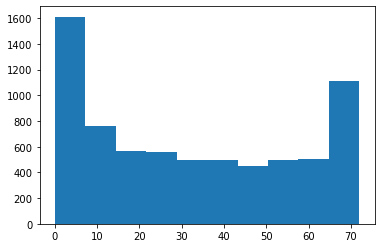

In [130]:
# show the distribution of tenure.
plt.hist(data = df, x = 'tenure');

In [131]:
df[df.customerID.duplicated()].shape[0]

0

In [132]:
df.shape

(7043, 21)

In [133]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [134]:
#Lets check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

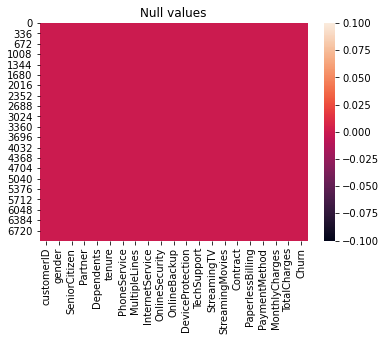

In [135]:
sb.heatmap(df.isnull())
plt.title('Null values')
plt.show()

From the above we can see that there are no null values in the datset.

In [136]:
# no missing value
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [137]:
df[df.duplicated()].shape[0]

0

Assessment report:

Quality issues

- The data type of "TotalCharges" should be float64 instead of object
- Many rows of total charges do not equal each tenues times monthly charges

# Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='gender'>

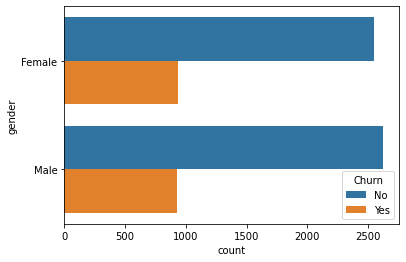

In [138]:
sb.countplot(y='gender',hue='Churn',data= df)

<AxesSubplot:xlabel='count', ylabel='PhoneService'>

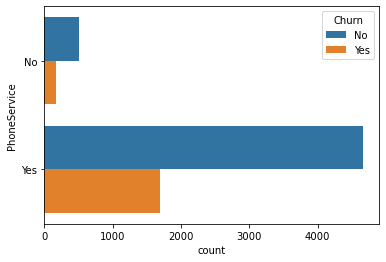

In [139]:
sb.countplot(y='PhoneService',hue='Churn',data = df)

<AxesSubplot:xlabel='count', ylabel='SeniorCitizen'>

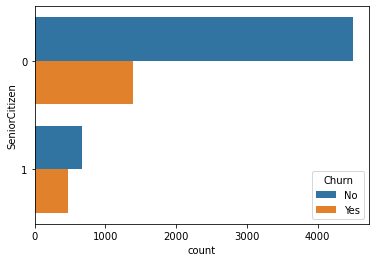

In [140]:
sb.countplot(y='SeniorCitizen',hue='Churn',data = df)

<AxesSubplot:xlabel='count', ylabel='Partner'>

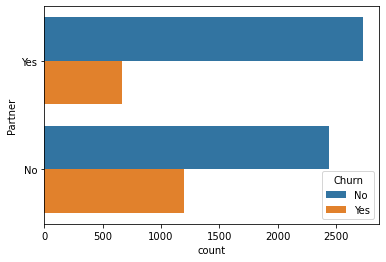

In [141]:
sb.countplot(y='Partner',hue='Churn',data = df)

<AxesSubplot:xlabel='count', ylabel='MultipleLines'>

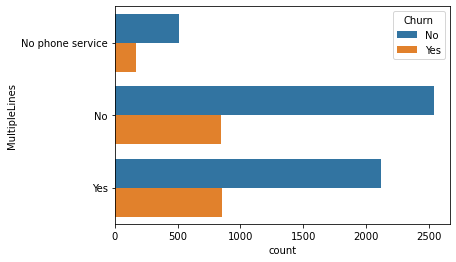

In [142]:
sb.countplot(y='MultipleLines',hue='Churn',data = df)

<AxesSubplot:xlabel='count', ylabel='Dependents'>

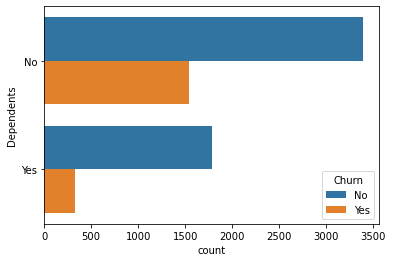

In [143]:
sb.countplot(y='Dependents',hue='Churn',data = df)

# Data Cleaning

In [144]:
df_copy = df.copy()

 The data type of "TotalCharges" should be float64 instead of object.We will give them the values of each tenures times monthly charges.

In [145]:
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)

In [146]:
df_copy.TotalCharges.dtype

dtype('float64')

Many rows of total charges do not equal each tenures times monthly charges. give them the values of each tenures times monthly charges

In [147]:
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

In [148]:
df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape

(0, 21)

In [149]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


Storing the Data

In [150]:
# store the clean data
df_copy.reset_index(drop=True)
df_copy.to_csv('Telco-Customer-Churn_clean.csv')

In [151]:
#loading the clean dataset where totalchanges is float and not object
df_new = pd.read_csv('Telco-Customer-Churn_clean.csv')

In [152]:
df_new.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


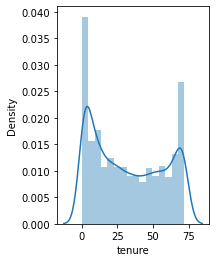

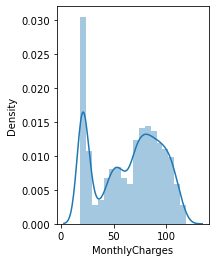

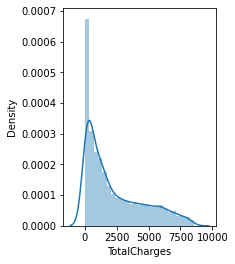

In [153]:
#Now lets look at the numerical variables
plt.figure(1), plt.subplot(121), sb.distplot(df_new['tenure']);
plt.figure(2), plt.subplot(121), sb.distplot(df_new['MonthlyCharges']);
plt.figure(3), plt.subplot(121), sb.distplot(df_new['TotalCharges']);

So till no we have do EDA and data cleaning, now lets convert all the categorical data to numerical data so that our model understands it better.

# Data Preparation & Feature Engineering:

Treating Irrelevant data & missing values
In our dataset, we can see that customer ID is not needed for our model so we drop the variable. We do not need to treat missing values as there are none in this dataset.

In [154]:
df_new.drop(['customerID'], axis=1, inplace=True)

Converting Categorical to numerical data
Machine learning works with only numerical values. Therefore, we need to convert our categorical values to numerical values. By using the Pandas function “get_dummies()”, we can replace the gender column with “gender_Female” and “gender_Male”. We will use df.info() to show us which ones are categorical and numerical.

In [155]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the results above, we can see that the variables with the object datatype need to be converted to numerical.

In [156]:
df = pd.get_dummies(df_new, columns = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first = True)

In [157]:
df.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1936.30,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,107.70,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1903.50,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,141.40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


# Splitting the dataset

In [158]:
df['Churn_Yes'] = df['Churn_Yes'].astype(int)
Y = df['Churn_Yes'].values
X = df.drop(labels = ['Churn_Yes'],axis = 1)



# Finding the best Random State

In [113]:
Y = df['Churn_Yes'].values
X = df.drop(labels = ['Churn_Yes'],axis = 1)

from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.30, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(X_train,y_train)
    predrf=RFC.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,'on Random_State',maxRS)

Best Accuracy is 0.8135352579271179 on Random_State 3


# Logisitic Regression

In [161]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.812588736393753
[[1426  142]
 [ 254  291]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1568
           1       0.67      0.53      0.60       545

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.81      2113



In [160]:
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

InternetService_Fiber optic              0.478018
PaymentMethod_Electronic check           0.389218
PaperlessBilling_Yes                     0.378879
SeniorCitizen                            0.327520
MultipleLines_Yes                        0.321919
MultipleLines_No phone service           0.085486
StreamingMovies_Yes                      0.008473
StreamingTV_Yes                          0.007737
MonthlyCharges                           0.003595
TotalCharges                             0.000343
gender_Male                              0.000283
Unnamed: 0                               0.000014
Partner_Yes                             -0.016796
tenure                                  -0.065022
PaymentMethod_Credit card (automatic)   -0.116043
OnlineSecurity_No internet service      -0.125384
InternetService_No                      -0.125384
OnlineBackup_No internet service        -0.125384
DeviceProtection_No internet service    -0.125384
TechSupport_No internet service         -0.125384


It can be observed that some variables have a positive relation to our predicted variable and some have a negative relation. Customers with negative values show that they are unlikely to churn while those with positive values shows they are likely to churn

# Using SVC

In [164]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

from sklearn.svm import SVC
model = SVC()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.7420728821580691
[[1568    0]
 [ 545    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1568
           1       0.00      0.00      0.00       545

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113



# Using RandomForestClassifier

In [170]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.8078561287269286
[[1439  129]
 [ 277  268]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1568
           1       0.68      0.49      0.57       545

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113



<AxesSubplot:>

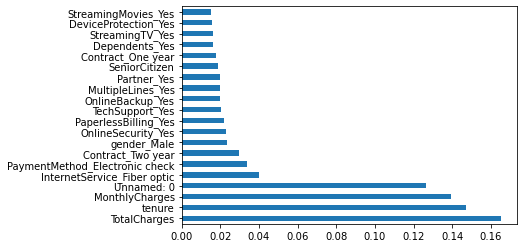

In [173]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

# Using MultinomialNB

In [174]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.5622337908187411
[[808 760]
 [165 380]]
              precision    recall  f1-score   support

           0       0.83      0.52      0.64      1568
           1       0.33      0.70      0.45       545

    accuracy                           0.56      2113
   macro avg       0.58      0.61      0.54      2113
weighted avg       0.70      0.56      0.59      2113



# Using KNeighborsClassifier

In [176]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.7231424514907714
[[1379  189]
 [ 396  149]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1568
           1       0.44      0.27      0.34       545

    accuracy                           0.72      2113
   macro avg       0.61      0.58      0.58      2113
weighted avg       0.69      0.72      0.70      2113



# DecisionTreeClassifier

In [177]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print(confusion_matrix(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.7392333175579744
[[1251  317]
 [ 234  311]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1568
           1       0.50      0.57      0.53       545

    accuracy                           0.74      2113
   macro avg       0.67      0.68      0.67      2113
weighted avg       0.75      0.74      0.74      2113



<AxesSubplot:>

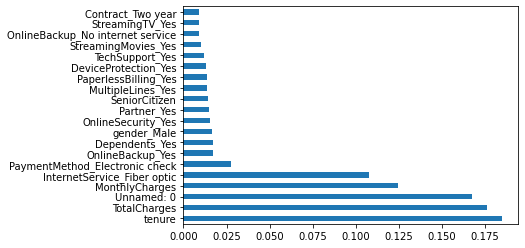

In [178]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

From the above we can conclude that the important factors that contribute in churn are:

- Tenure
- TotalCharges
- Monthly Charges

# CrossValidation For the dataset:

In [180]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(RandomForestClassifier(),X,Y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.7929872491773663


In [181]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(SVC(),X,Y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.7346301575908123


In [182]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(MultinomialNB(),X,Y, cv=5)
print('Cross validation score of MultinomialNB model :',scr.mean())

Cross validation score of MultinomialNB model : 0.5498797301438803


In [183]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(DecisionTreeClassifier(),X,Y, cv=5)
print('Cross validation score of DecisionTreeClassifier model :',scr.mean())

Cross validation score of DecisionTreeClassifier model : 0.6847733119878702


In [184]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(KNeighborsClassifier(),X,Y, cv=5)
print('Cross validation score of KNeighborsClassifier model :',scr.mean())

Cross validation score of KNeighborsClassifier model : 0.6596552600167753


In [185]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LogisticRegression(),X,Y, cv=5)
print('Cross validation score of KNeighborsClassifier model :',scr.mean())

Cross validation score of KNeighborsClassifier model : 0.8015054398670882


# GridSearch CV Parameter Tuning

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition, datasets

In [210]:
#creating parameters list to pass in GridSearchCv

parameters = dict(logistic_Reg__C=C,logistic_Reg__penalty=penalty)

In [211]:
n_components = list(range(1,X.shape[1]+1,1))

In [212]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [213]:
parameters = dict(logistic_Reg__C=C,logistic_Reg__penalty=penalty)


In [206]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, Y)

GridSearchCV(estimator=Pipeline(steps=[('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.8117687...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2']})

In [215]:
GCV_pred=clf_GS.best_estimator_.predict(X)

In [216]:
accuracy_score(Y,GCV_pred)

0.8023569501632827

In [209]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])


Best Penalty: l2
Best C: 494.1713361323828

LogisticRegression(C=494.1713361323828)


# Saving Best Model Using PKl

In [218]:
import joblib
filename = 'churn_model.pkl'
joblib.dump(clf_GS.best_estimator_, filename)

['churn_model.pkl']